### import nessesary library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from path import Path
import re
import requests
import io
import json
%matplotlib inline

In [2]:
main_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'

In [ ]:
# case = ['confirmed','deaths','recovered']

In [3]:
confirmed_url = main_path+'/time_series_covid19_confirmed_global.csv'
death_url = main_path+'/time_series_covid19_deaths_global.csv'
recovered_url = main_path+'/time_series_covid19_recovered_global.csv'

In [4]:
s1 = requests.get(confirmed_url).content
s2 = requests.get(death_url).content
s3 = requests.get(recovered_url).content

In [5]:
confirmed_df =pd.read_csv(io.StringIO(s1.decode('utf-8')))
death_df =pd.read_csv(io.StringIO(s2.decode('utf-8')))
recovered_df =pd.read_csv(io.StringIO(s3.decode('utf-8')))

In [6]:
confirmed_df = confirmed_df.drop(columns='Province/State')
eath_df =death_df.drop(columns='Province/State')
recovered_df =recovered_df.drop(columns='Province/State')

In [7]:
confirmed_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [8]:
thai_death = eath_df[eath_df['Country/Region'] == 'Thailand']

In [9]:
thai_death = thai_death.drop(columns=['Lat','Long'])

In [10]:
thai_death.set_index(thai_death['Country/Region'],inplace=True)

In [12]:
thai_death = thai_death.drop(columns=['Country/Region'])

In [13]:
thai_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,4,4,4,5,6,7


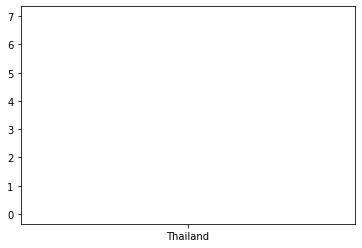

In [14]:
plt.plot(thai_death)